# Exploratory Data Analysis (EDA) Image Analysis 

## Emotion Face Classifier Notebook 3

Visuals example images, image properties, and uses unsupervised models for feature extraction

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
%matplotlib inline

In [4]:
from IPython.display import display

In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt

from datascifuncs.tidbit_tools import load_json, write_json, print_json, check_directory_name

In [6]:
main_dir = 'EmotionFaceClassifier'
check_directory_name(main_dir)

Directory set to /Users/dsl/Documents/GitHub/EmotionFaceClassifier, matches target dir string EmotionFaceClassifier.


True

In [7]:
from utils.image_processing import (
    generate_sample_images,
    plot_matrix,
    preprocess_images,
    apply_ticks,
    set_spines_and_titles_by_column,
    add_figure_title,
    add_text_box,
    save_figure
)

In [8]:
# from utils.image_processing import (
#     preprocess_images,
#     generate_sample_images,
#     plot_face_matrix,
#     generate_composite_faces,
#     run_dimensionality_reduction,
#     generate_pixel_intensities
# )

In [9]:
# from utils.analysis_tools import instantiate_model

In [10]:
# Read in FER 2013 data
fer2013_path = 'data/fer2013_paths.csv'
fer2013 = pd.read_csv(fer2013_path)

In [11]:
fer2013.head()

,emotion_id,pixels,Usage,emotion,image,usage,emo_count_id,img_path,color
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training,Angry,[[ 70 80 82 ... 52 43 41]\n [ 65 61 58 ...,Training,1,data/Training/Angry/Angry-1.jpg,red
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training,Angry,[[151 150 147 ... 129 140 120]\n [151 149 149 ...,Training,2,data/Training/Angry/Angry-2.jpg,red
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training,Fear,[[231 212 156 ... 44 27 16]\n [229 175 148 ...,Training,1,data/Training/Fear/Fear-1.jpg,slategray
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training,Sad,[[ 24 32 36 ... 173 172 173]\n [ 25 34 29 ...,Training,1,data/Training/Sad/Sad-1.jpg,blue
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training,Neutral,[[ 4 0 0 ... 27 24 25]\n [ 1 0 0 ... 26 23...,Training,1,data/Training/Neutral/Neutral-1.jpg,sienna


In [12]:
# Select training data
print(fer2013.shape)
train_df = fer2013[fer2013['usage']=='Training']
print(train_df.shape)

(35887, 9)
(28709, 9)


In [13]:
# Load common dicts from json config file
common_dicts = load_json('./configs/input_mappings.json')
# print_json(common_dicts)

In [14]:
# Get subset of emo-color mappings
color_dict = common_dicts['plotly_styles']['Training']['color']
color_dict

{'Angry': 'red',
 'Disgust': 'olive',
 'Fear': 'slategray',
 'Happy': 'gold',
 'Sad': 'blue',
 'Surprise': 'darkviolet',
 'Neutral': 'sienna'}

In [15]:
emo_samples = generate_sample_images(train_df, n=5, cat_col='emotion', path_col='img_path')

In [16]:
color_dict

{'Angry': 'red',
 'Disgust': 'olive',
 'Fear': 'slategray',
 'Happy': 'gold',
 'Sad': 'blue',
 'Surprise': 'darkviolet',
 'Neutral': 'sienna'}

In [17]:
plot_params = load_json('./configs/plotting_params.json')

In [18]:
sample_imgs_save_path = os.path.join('imgs', 'comparisons', 'sample_images.png')

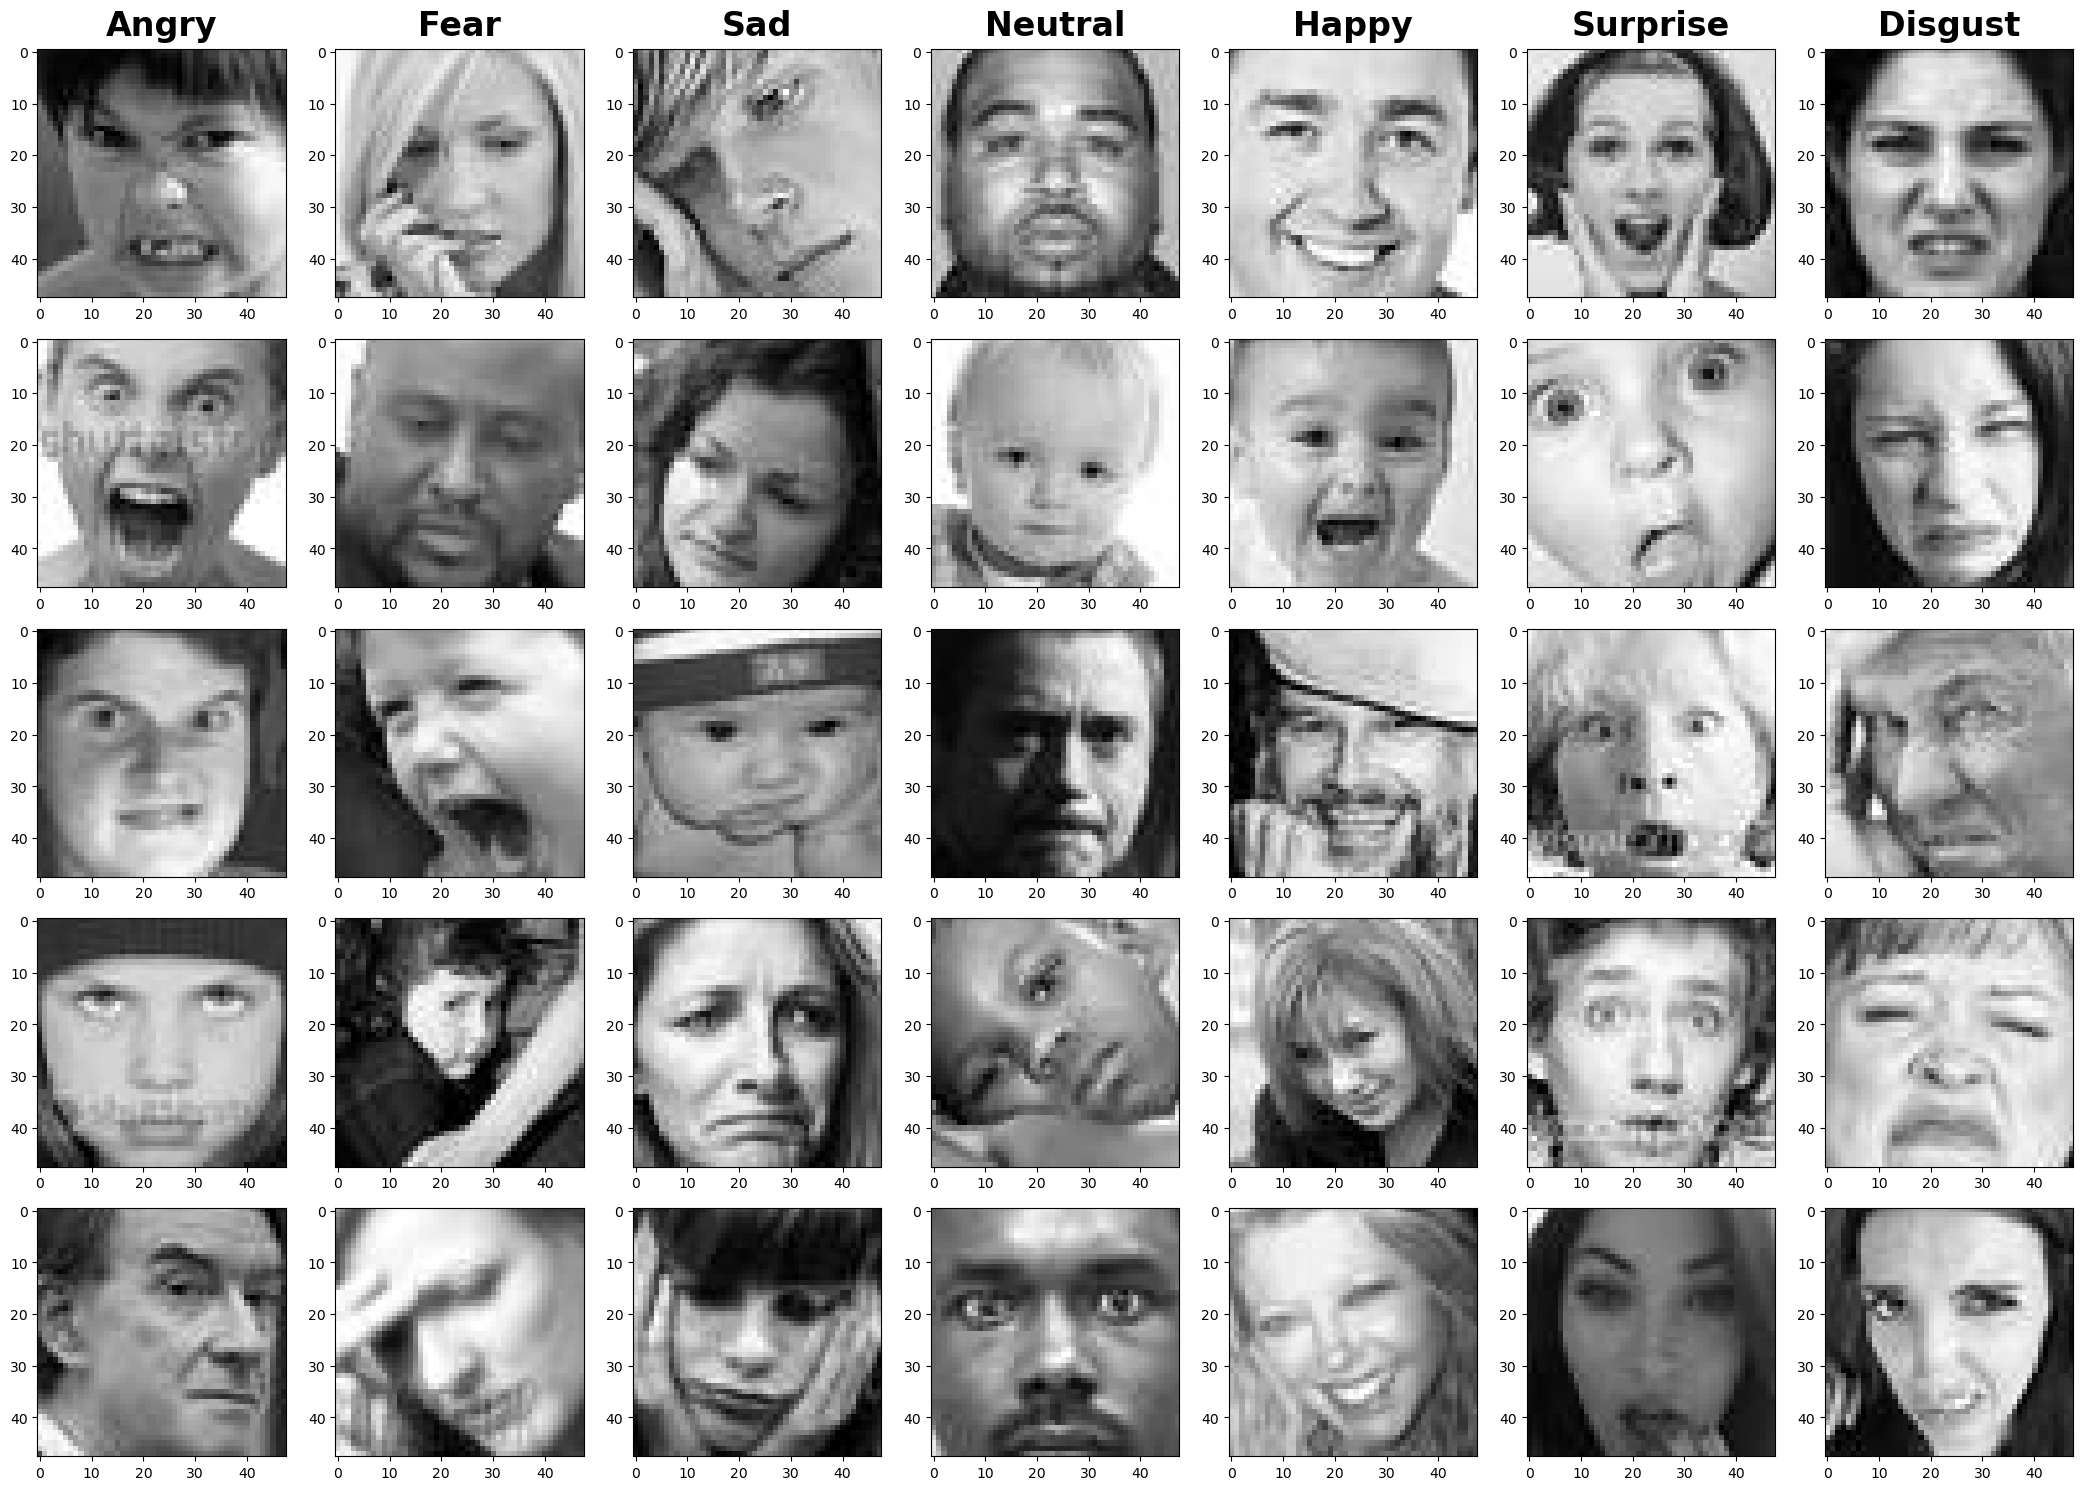

In [19]:
fig, axes = plot_matrix(
    image_dict=emo_samples, 
    row_labels=None
)

In [20]:
apply_ticks(axes, plot_params)

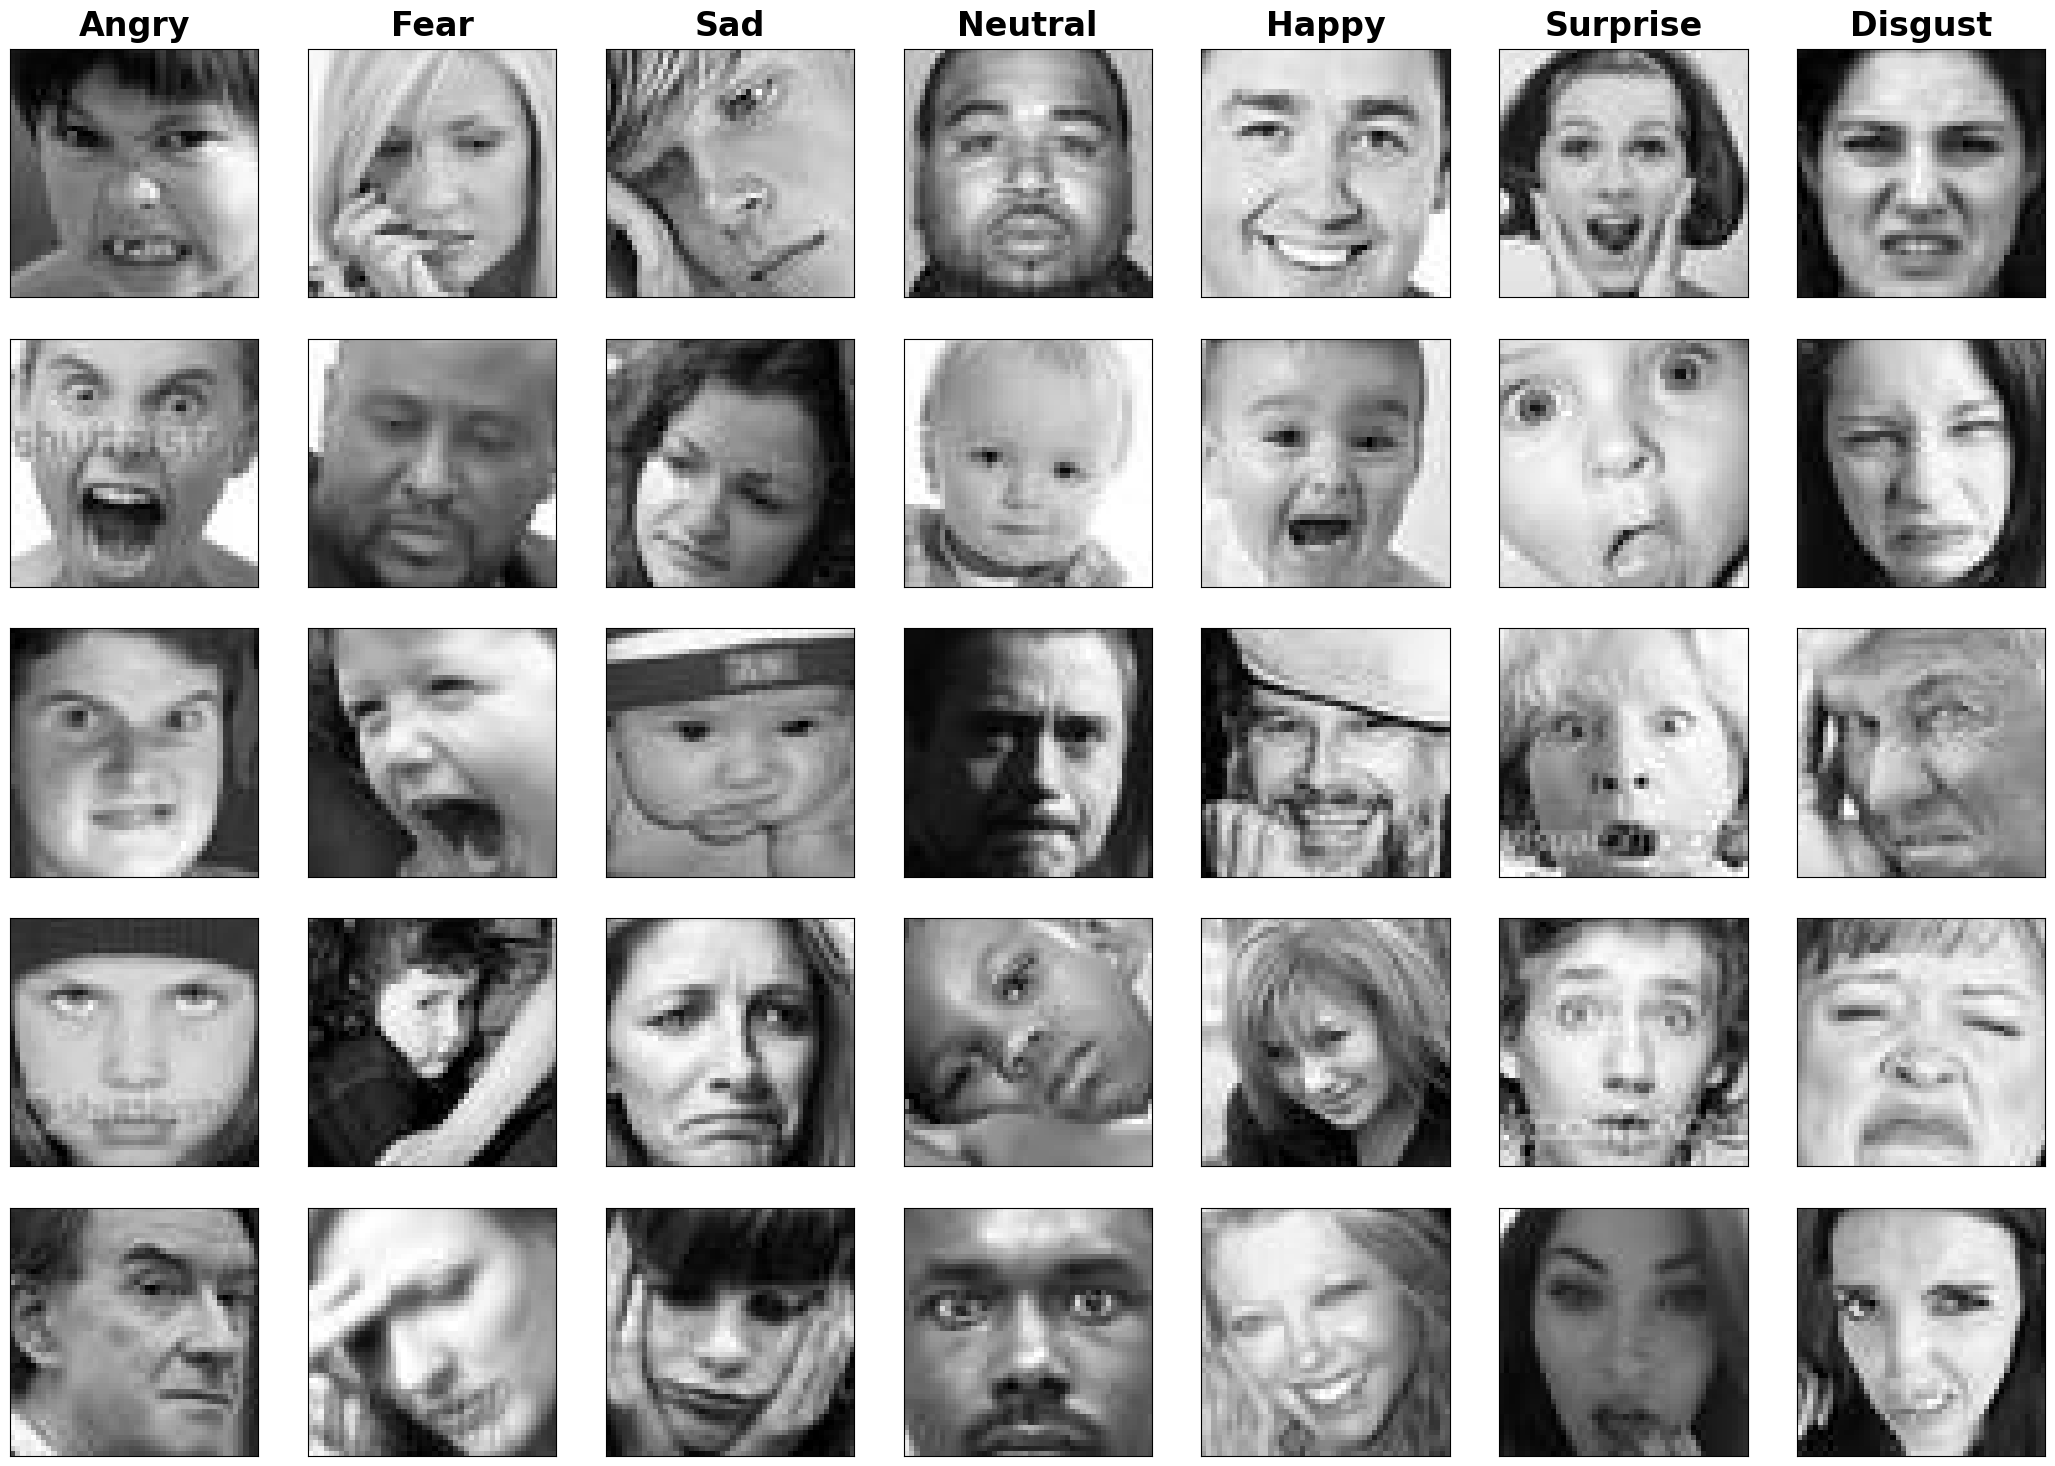

In [21]:
display(fig)

In [22]:
set_spines_and_titles_by_column(axes, title_colors=color_dict)

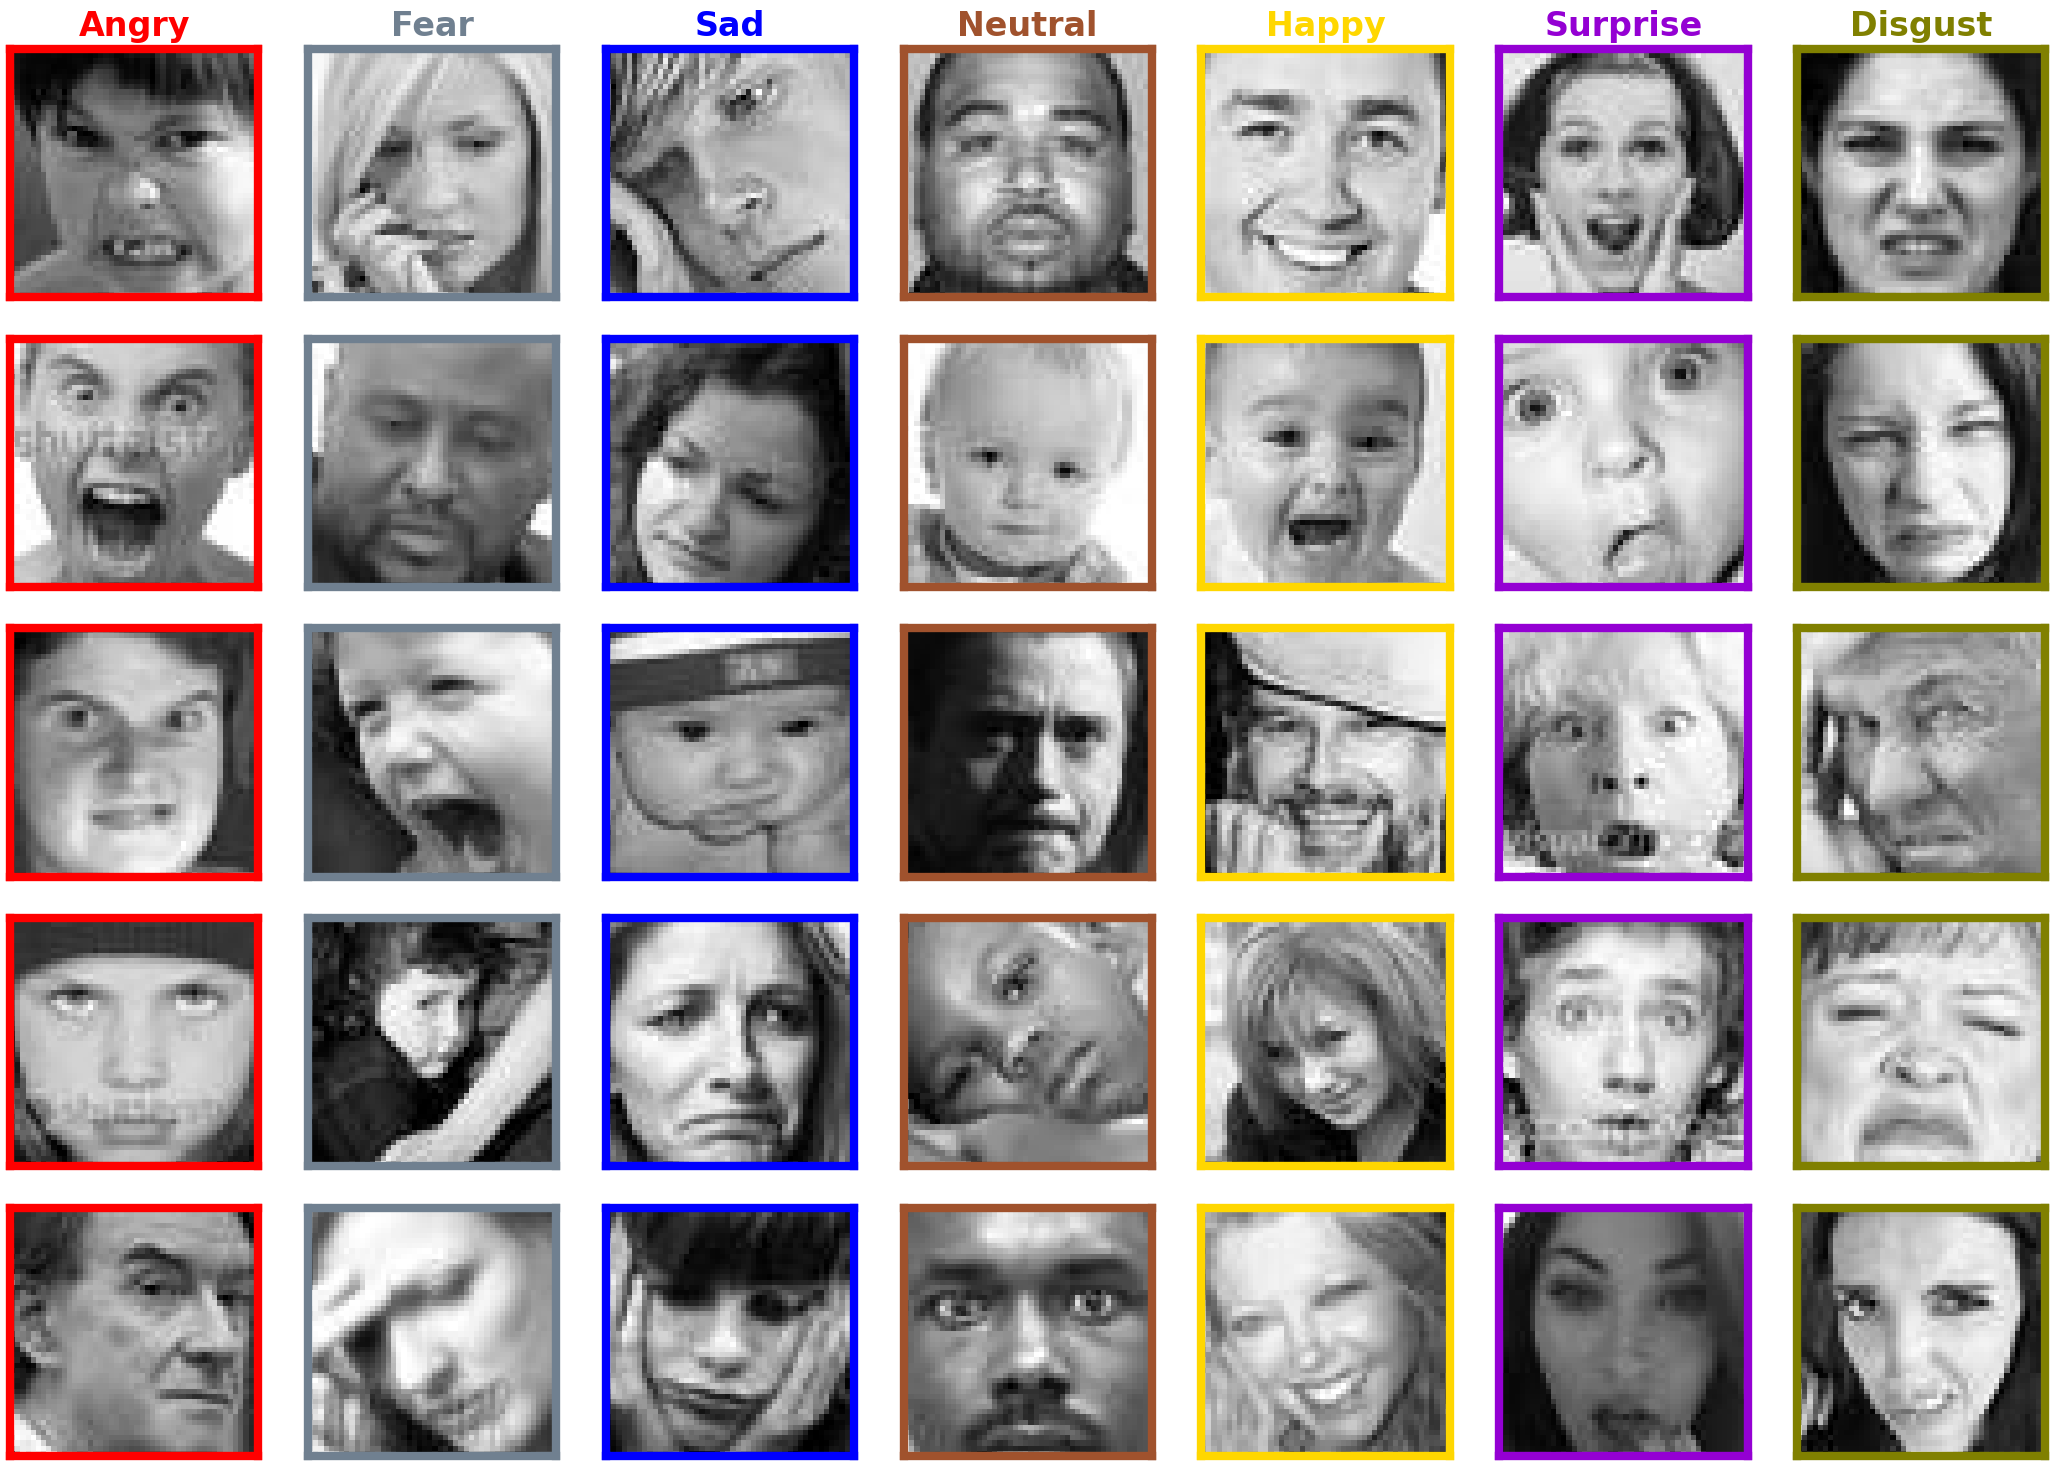

In [23]:
display(fig)

In [24]:
add_figure_title(fig, plot_params['figure_title'], 'Example Faces')

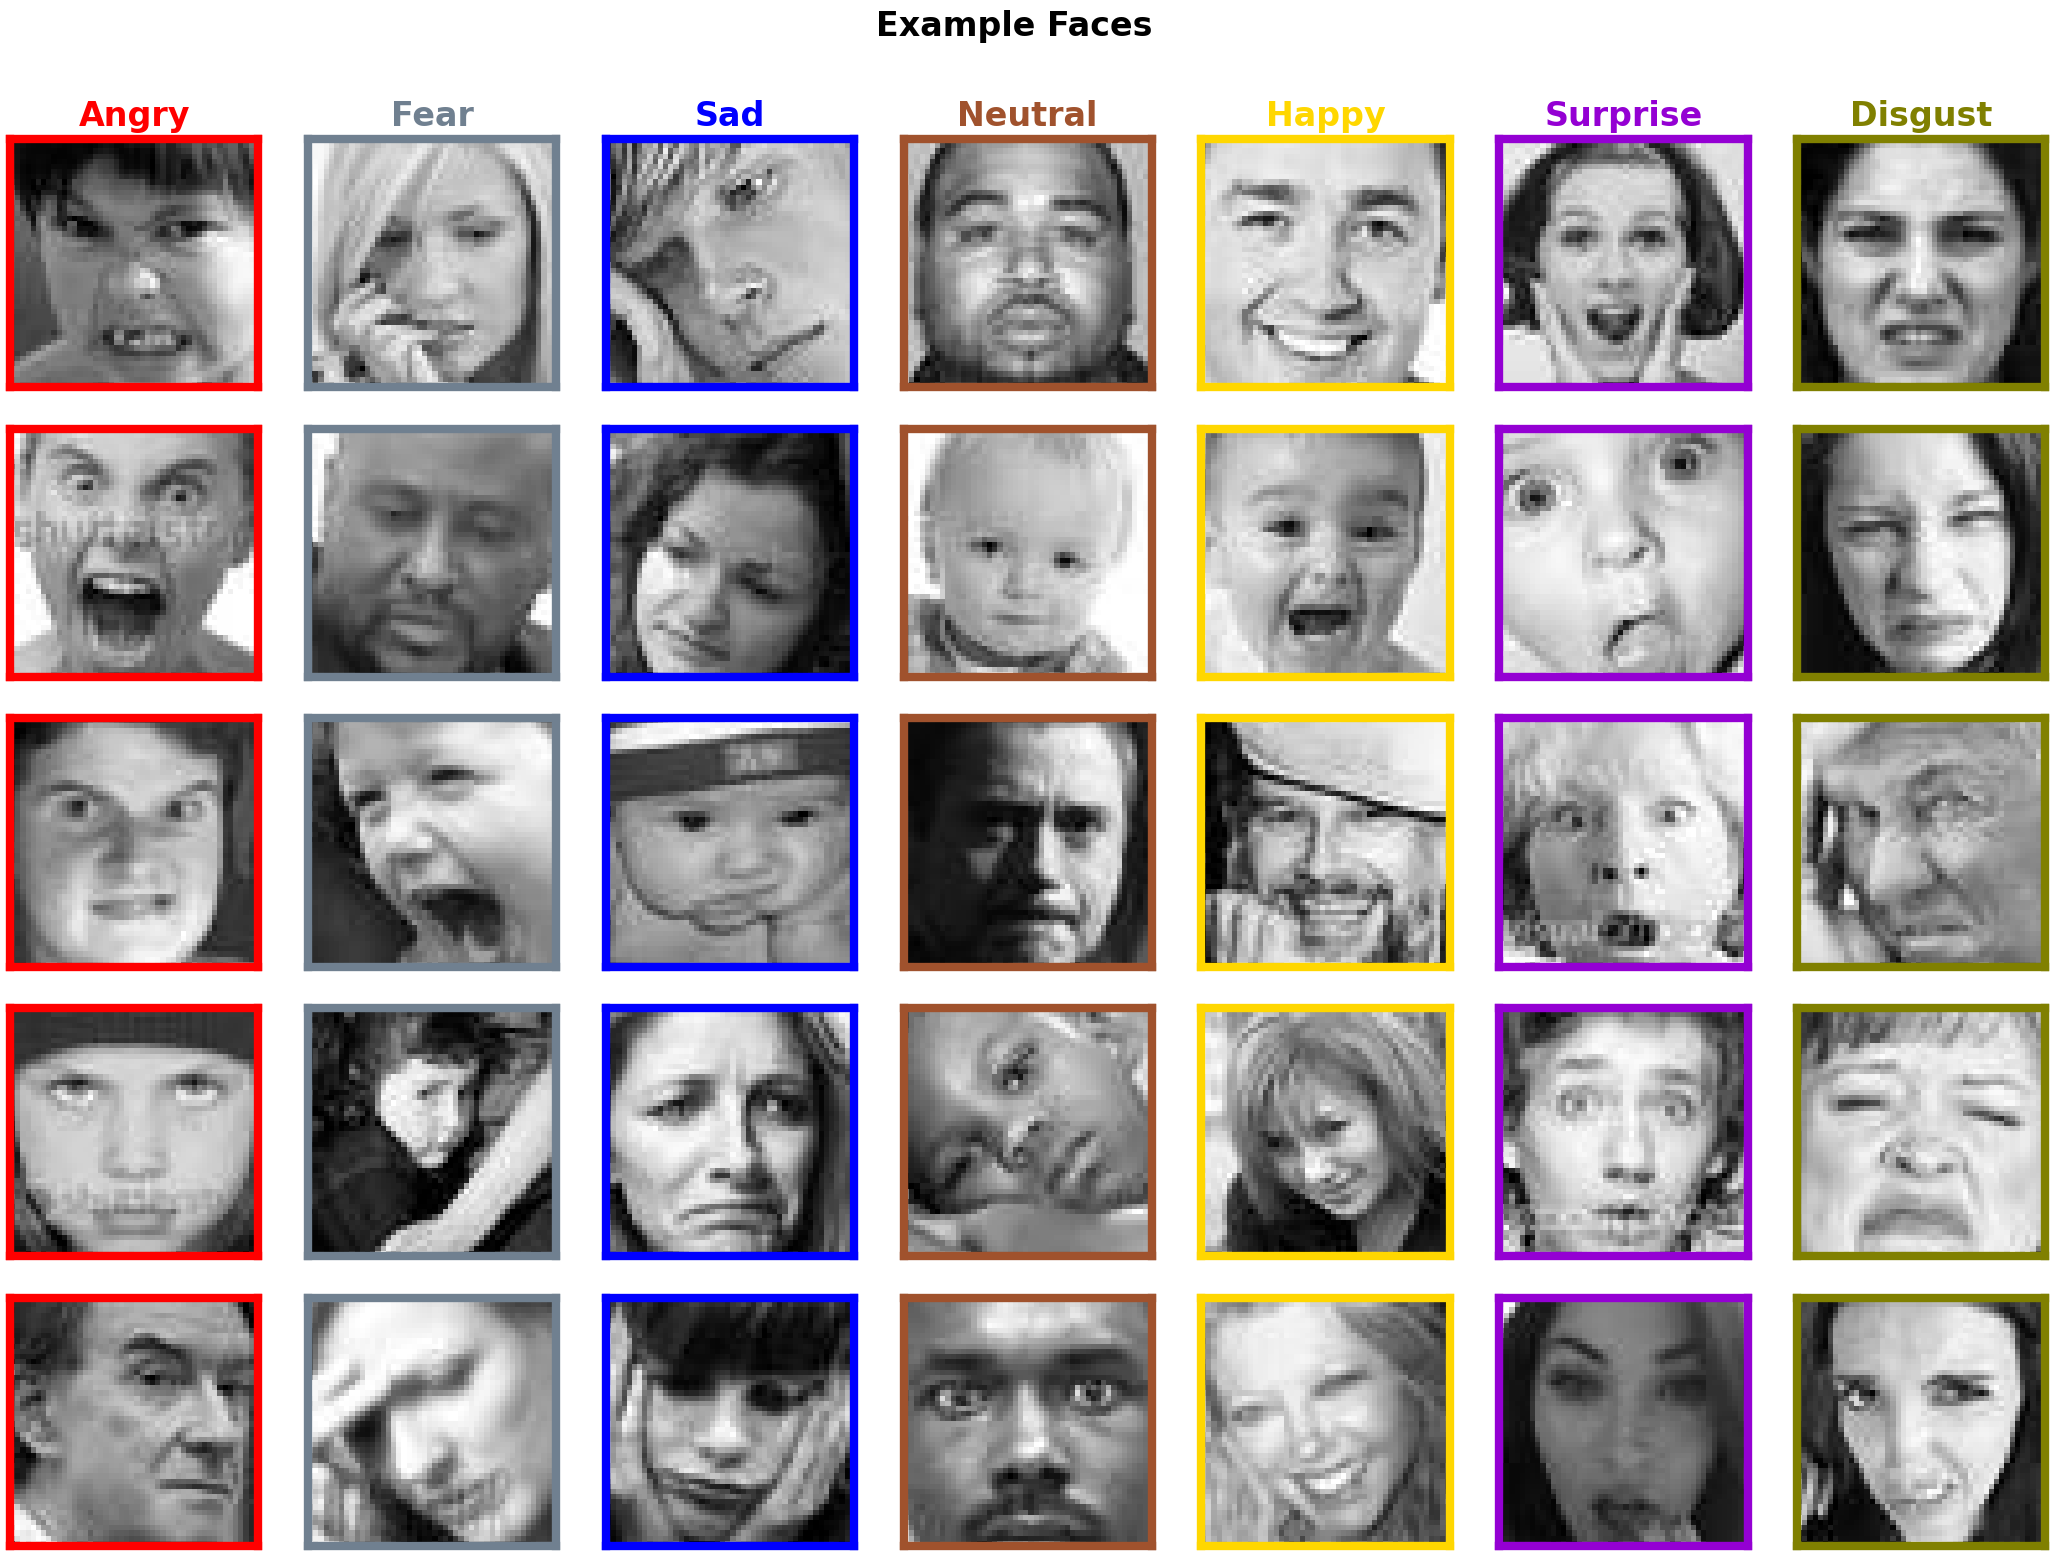

In [25]:
display(fig)

In [26]:
add_text_box(fig, plot_params['text_box'], text='Example 48x48 grayscale images from each category')

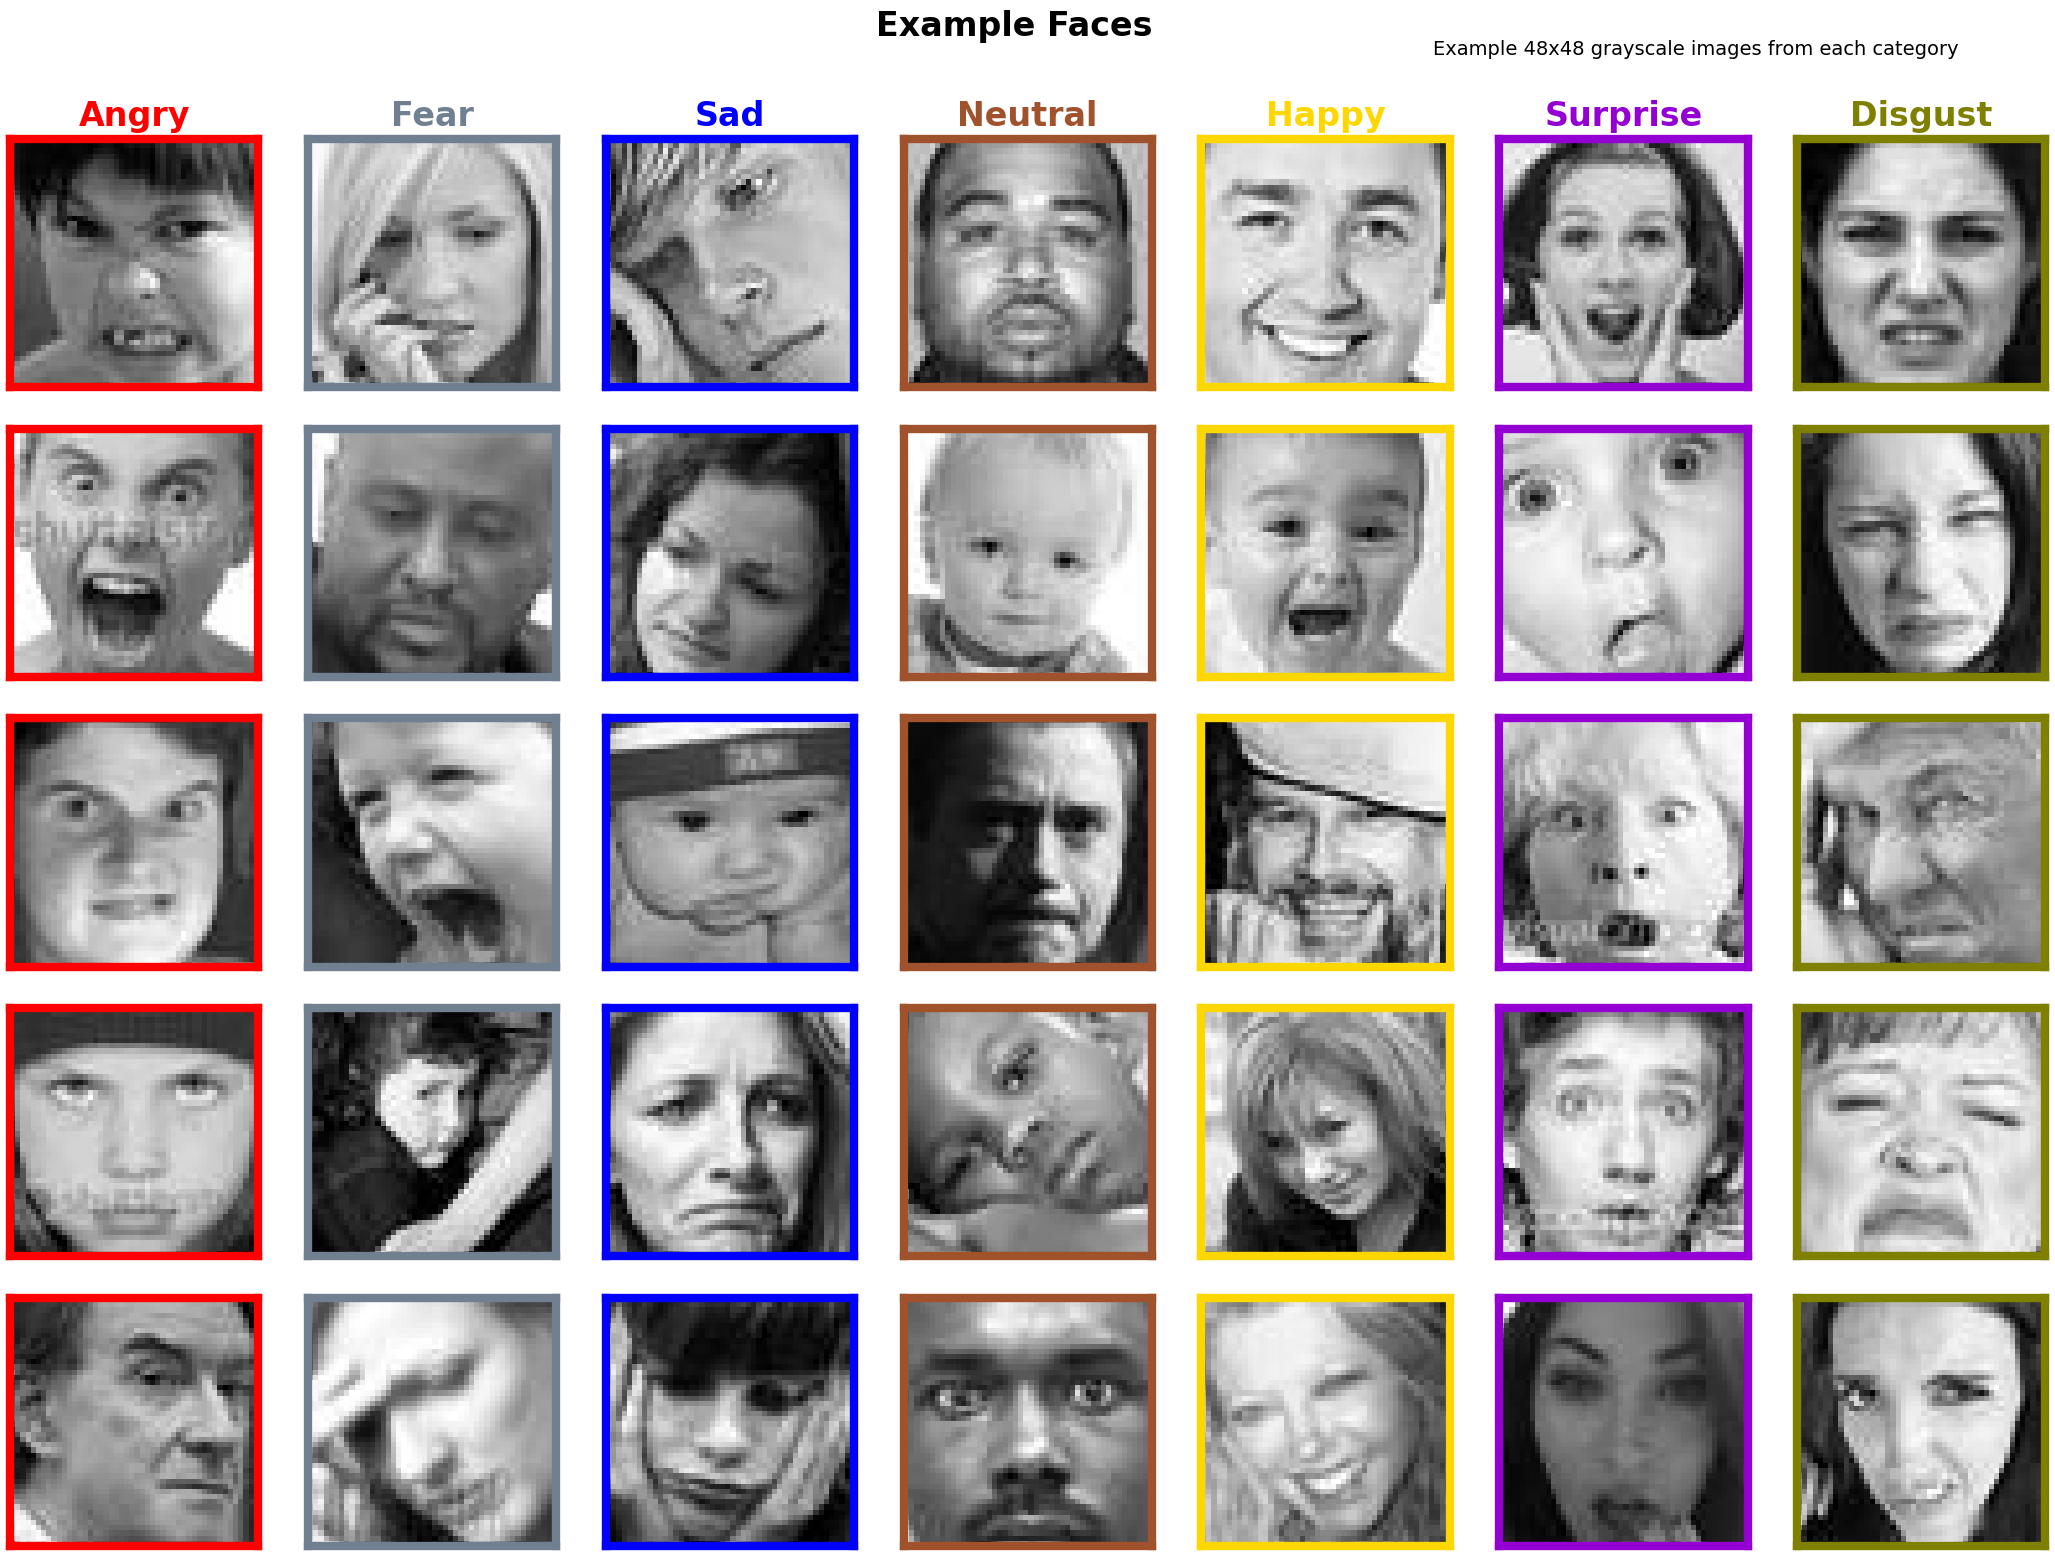

In [27]:
display(fig)

In [28]:
save_path = os.path.join('imgs', 'comparisons', 'sample_images.png')

In [29]:
save_figure(fig, save_path=save_path, dpi=150)

Figure saved to imgs/comparisons/sample_images.png


In [30]:
# X_train, y_train = preprocess_images(fer2013, usage='Training', flatten=True)

In [31]:
# pixel_imgs_save_path = os.path.join('imgs', 'comparisons', 'pixel_intensities.png')

In [32]:
# generate_pixel_intensities(X_train, y_train, color_dict=color_dict, save_path=pixel_imgs_save_path)

In [33]:
# composite_face_dict, row_labels = generate_composite_faces(X_train, y_train, overall=True)

In [34]:
# composite_imgs_save_path = os.path.join('imgs', 'comparisons', 'composite_faces.png')

In [35]:
# plot_matrix(
#     image_dict=composite_face_dict, 
#     row_labels=row_labels
# )